# __Data Wrangling__

## __Agenda__

- Introduction to Data Wrangling
- Data Collection
- Data Inspection
  * Accessing Rows Using .iloc and .loc
  * Checking for Missing Values
  * Handling Missing Data
- Dealing with Duplicates
- Data Cleaning
- Data Transformation
- Data Binning
- Handling Outliers
- Pandas Joining Techniques
    * Pandas Concatenate
    * Pandas Merge Dataframes
    * Pandas Join Dataframes
- Aggregating Data
- Reshaping Data

# __1. Introduction to Data Wrangling__
Data wrangling, also known as data munging or data preprocessing, is the process of cleaning, structuring, and transforming raw data into a format suitable for analysis.
- It is a crucial step in the data preparation pipeline, aiming to make the data more accessible, understandable, and ready for various analytical tasks.
- It involves dealing with missing values, handling outliers, transforming variables, and merging datasets, among other tasks.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Introduction.png)

# __2. Data Collection:__

Data collection is the process of gathering information from diverse sources to build a comprehensive dataset for analysis.
- Sources may include databases, APIs (application programming interfaces), spreadsheets, or external files. Effective data collection ensures the availability of relevant and reliable information.

### __Loading Data:__
Start by loading data into a Pandas DataFrame

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Loading.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('HousePrices.csv')

# __3. Data Inspection__
It involves exploring the dataset to gain insights into its structure and quality.
- This step involves using functions like df.head(), df.info(), and df.describe() to gain insights into the dataset's structure, data types, and statistical summaries. Checking for missing values, outliers, and inconsistencies is crucial to identify potential issues that need addressing.

In [22]:
# Inspecting the first few rows of the DataFrame
display(df.head())

# Displaying the last few rows of the DataFrame
display(df.tail())

# Providing information about the DataFrame, including data types and non-null counts
display(df.info())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

None

In [2]:
# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, and so on.
display(df.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### Synthesize missing data for demonstration

In [3]:
# Make a copy of our dataframe to manipulate
df_missing = df.copy()

# In our new dataframe, set some values in numeric columns 'sqft_lot' and 'yr_built' to NaN for illustration
nan_indices = df_missing.sample(frac=0.05, random_state=1).index  # 5% of rows
if 'sqft_lot' in df_missing.columns:
    df_missing.loc[nan_indices, 'sqft_lot'] = np.nan
if 'yr_built' in df.columns:
    df_missing.loc[nan_indices, 'yr_built'] = np.nan

In [6]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4370 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4370 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df_missing.isnull().sum()

date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot         230
floors             0
waterfront         0
view               0
condition          0
sqft_above         0
sqft_basement      0
yr_built         230
yr_renovated       0
street             0
city               0
statezip           0
country            0
dtype: int64

In [8]:
# Save a copy of our missing dataframe for later comparison
df_missing_original = df_missing.copy()

## __3.1 Accessing Rows Using .iloc and .loc__
Inspecting the dataset involves exploring its content.
- Using .iloc and .loc allows you to access specific rows based on integer-location or label-based indexing, respectively.

In [9]:
# Access the first row using iloc
result_iloc_0 = df_missing.iloc[0]

# Display the result for df.iloc[0]
print("Result for df.iloc[0]:")
print(result_iloc_0)
print()


Result for df.iloc[0]:
date              2014-05-02 00:00:00
price                        313000.0
bedrooms                          3.0
bathrooms                         1.5
sqft_living                      1340
sqft_lot                       7912.0
floors                            1.5
waterfront                          0
view                                0
condition                           3
sqft_above                       1340
sqft_basement                       0
yr_built                       1955.0
yr_renovated                     2005
street           18810 Densmore Ave N
city                        Shoreline
statezip                     WA 98133
country                           USA
Name: 0, dtype: object



In [10]:
# Access the eleventh row using iloc
result_iloc_10 = df_missing.iloc[10]

# Display the result for df.iloc[10]
print("Result for df.iloc[10]:")
print(result_iloc_10)

Result for df.iloc[10]:
date             2014-05-02 00:00:00
price                       463000.0
bedrooms                         3.0
bathrooms                       1.75
sqft_living                     1710
sqft_lot                      7320.0
floors                           1.0
waterfront                         0
view                               0
condition                          3
sqft_above                      1710
sqft_basement                      0
yr_built                      1948.0
yr_renovated                    1994
street            Burke-Gilman Trail
city                Lake Forest Park
statezip                    WA 98155
country                          USA
Name: 10, dtype: object


## __3.2 Checking for Missing Values__
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Checking_for_missing_values.png)

In [11]:
# Checking for missing values
missing_values = df_missing.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot         230
floors             0
waterfront         0
view               0
condition          0
sqft_above         0
sqft_basement      0
yr_built         230
yr_renovated       0
street             0
city               0
statezip           0
country            0
dtype: int64


In [12]:
# What do those NaNs look like?
rows_with_nans = df_missing[df_missing.isna().any(axis=1)]
print("\nRows with missing values:")
display(rows_with_nans.head())
display(rows_with_nans.info())


Rows with missing values:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
21,2014-05-02 00:00:00,435000.0,4.0,1.00,1450,NaN,1.0,0,0,4,1450,0,NaN,1979,3922 154th Ave SE,Bellevue,WA 98006,USA
44,2014-05-02 00:00:00,235000.0,2.0,1.00,1210,NaN,1.0,0,0,2,1210,0,NaN,0,7542 21st Ave SW,Seattle,WA 98106,USA
62,2014-05-02 00:00:00,625000.0,4.0,3.25,2730,NaN,1.0,0,0,3,1560,1170,NaN,0,9927 174th Ave SE,Renton,WA 98059,USA
82,2014-05-05 00:00:00,580000.0,2.0,1.00,2540,NaN,1.0,0,0,5,1320,1220,NaN,0,8624 Island Dr S,Seattle,WA 98118,USA
90,2014-05-05 00:00:00,800866.0,5.0,2.50,3180,NaN,2.0,0,0,4,3180,0,NaN,0,11821 NE 48th Pl,Kirkland,WA 98033,USA


<class 'pandas.core.frame.DataFrame'>
Index: 230 entries, 21 to 4529
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           230 non-null    object 
 1   price          230 non-null    float64
 2   bedrooms       230 non-null    float64
 3   bathrooms      230 non-null    float64
 4   sqft_living    230 non-null    int64  
 5   sqft_lot       0 non-null      float64
 6   floors         230 non-null    float64
 7   waterfront     230 non-null    int64  
 8   view           230 non-null    int64  
 9   condition      230 non-null    int64  
 10  sqft_above     230 non-null    int64  
 11  sqft_basement  230 non-null    int64  
 12  yr_built       0 non-null      float64
 13  yr_renovated   230 non-null    int64  
 14  street         230 non-null    object 
 15  city           230 non-null    object 
 16  statezip       230 non-null    object 
 17  country        230 non-null    object 
dtypes: float64(6)

None

## __3.3 Handling Missing Data__

Missing data is a common issue in real-world datasets. There are multiple strategies to handle missing values depending on the nature of the data, the amount of data missing, and the goals of your analysis.

### What is Imputation?
Imputation is the process of replacing missing data with substituted values. It helps prevent data loss and allows models to be trained on complete datasets. The imputed values are not the actual missing ones, but are estimates based on existing data. The choice of imputation method depends on the type of data, its distribution, and the context of the problem.

Below is a summary of common imputation techniques and their use cases:

| Method                 | Description                                           | When to Use                                     |
|------------------------|-------------------------------------------------------|--------------------------------------------------|
| Drop Rows              | Remove rows with missing values                      | When only a small number of rows are missing     |
| Drop Columns           | Remove entire columns                                | When an entire column is mostly missing         |
| Mean Imputation        | Fill missing values with the column mean             | For normally distributed numerical data          |
| Median Imputation      | Fill missing values with the column median           | For skewed numerical data                        |
| Mode Imputation        | Fill with the most frequent value                    | For categorical features                         |
| Constant Imputation    | Replace with a fixed value (e.g., 0 or 'Unknown')    | For flagging or special categorical placeholders |
| Forward/Backward Fill  | Use previous or next valid value                     | For time series or ordered data                  |
| Model-based Imputation | Predict missing values using ML models              | When relationships with other features exist     |


> Since we are dealing with numerical missing data, we can use the central tendency for imputation, but we'll need to check for normalcy.

What do the distributions of the features with missing data look like?

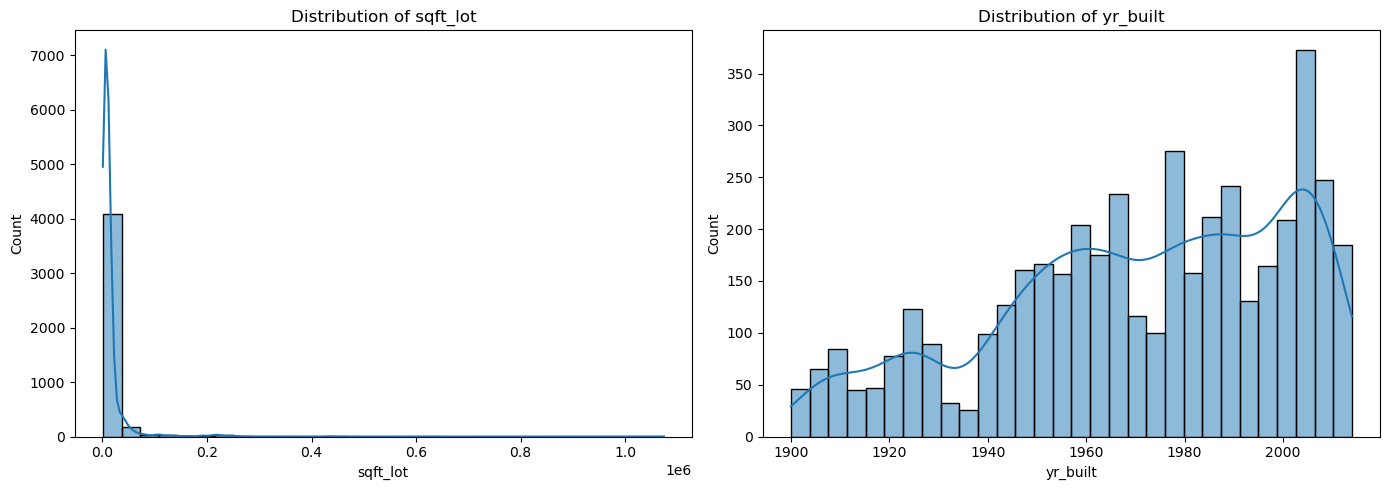

In [13]:
# Visualize the distributions to choose an imputation strategy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_missing['sqft_lot'], kde=True, bins=30)
plt.title('Distribution of sqft_lot')

plt.subplot(1, 2, 2)
sns.histplot(df_missing['yr_built'], kde=True, bins=30)
plt.title('Distribution of yr_built')

plt.tight_layout()
plt.show()

> **Caution:** We used KDE to view the distribution of `yr_built`, which is technically a discrete variable. While KDE is helpful for visualizing the trend, it is mathematically more appropriate for continuous data. Since yr_built is discrete, interpret the KDE curve as a general guide, not an exact representation. The histogram of a discrete variable is a much better guide, although the KDE can still be useful when you want a smooth curve to visualize general trends, and you're working with a large number of unique values, which makes the histogram jagged.

In this case, the distributions of `sqft_lot` and `yr_built` appear skewed. Therefore, **median imputation** is more appropriate than mean imputation, as the median is less sensitive to outliers and skewed distributions.

### Contextual Discussion - `sqrft_lot`

- Does a missing value imply a small or standard lot?
- Could imputation introduce bias if certain neighboorhoods or types of homes are overrepresented in the median

### Contextual Discussion - `yr_built`

- Is the year likely to be critical to pricing or valuation models?
- Would it be more appropriate to flag these as missing explicitly for downstream analysis?

In [14]:
# Save rows with NaNs to compare after imputation
imputation_targets = rows_with_nans.copy()

In [15]:
# Manually impute missing values using the median due to skewed distribution
if 'sqft_lot' in df_missing.columns:
    df_missing['sqft_lot'] = df_missing['sqft_lot'].fillna(df_missing['sqft_lot'].median())
if 'yr_built' in df_missing.columns:
    df_missing['yr_built'] = df_missing['yr_built'].fillna(df_missing['yr_built'].median())

In [16]:
# Show imputed values in those previously NaN rows
imputed_rows = df_missing.loc[imputation_targets.index, ['sqft_lot', 'yr_built']]
print("\nImputed values:")
print(imputed_rows.head())


Imputed values:
    sqft_lot  yr_built
21    7700.0    1976.0
44    7700.0    1976.0
62    7700.0    1976.0
82    7700.0    1976.0
90    7700.0    1976.0


In [17]:
# Verify that all missing values have been filled
print("\nMissing values after imputation:")
print(df_missing.isna().sum())


Missing values after imputation:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


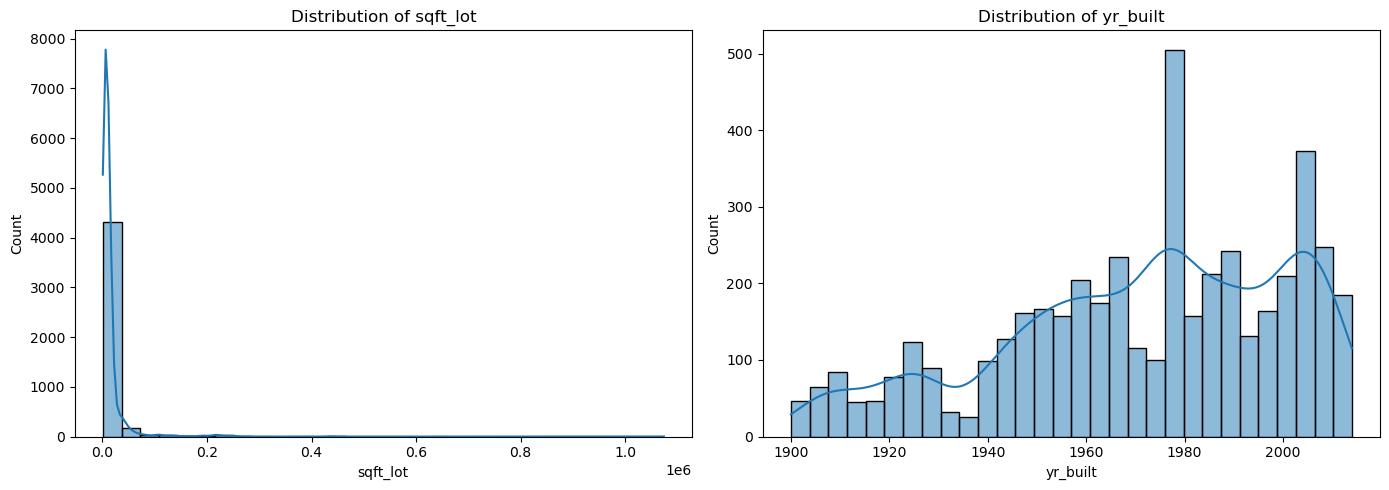

In [18]:
# Visualize the distributions after imputation to discuss impact
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_missing['sqft_lot'], kde=True, bins=30)
plt.title('Distribution of sqft_lot')

plt.subplot(1, 2, 2)
sns.histplot(df_missing['yr_built'], kde=True, bins=30)
plt.title('Distribution of yr_built')

plt.tight_layout()
plt.show()

### Observations after Imputation

- The overall shape of the `sqft_lot` feaure hasn't changed significantly
- In `yr_built`, there is a small spike in the median year, where missing values were imputed
- The distributional integrity is largly preserved after median imputation, making it a safe choice

### Is there a programmatic method for imputation?

Yes, sklearn has a library for that!

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
# Before we use SimpleImputer, let's save a copy of our manually imputed dataframe for later comparison
df_manual_imputed = df_missing.copy()

# Also, we'll create a copy of the original missing dataframe, before manual imputation, so we can compare results with auto imputation
dF_auto_imputed = df_missing_original.copy()

# Create a SimpleImputer instance for median imputation
imputer = SimpleImputer(strategy='median')

# Apply (fit) it to the 'sqft_lot' and 'yr_built' columns
dF_auto_imputed[['sqft_lot', 'yr_built']] = imputer.fit_transform(dF_auto_imputed[['sqft_lot', 'yr_built']])

### Compate manual imputation to auto imputation

In [21]:
# Check if the columns are equal after manual vs. sklearn imputation
sqft_lot_equal = df_manual_imputed['sqft_lot'].equals(dF_auto_imputed['sqft_lot'])
yr_built_equal = df_manual_imputed['yr_built'].equals(dF_auto_imputed['yr_built'])

print(f"sqft_lot imputation match: {sqft_lot_equal}")
print(f"yr_built imputation match: {yr_built_equal}")


sqft_lot imputation match: True
yr_built imputation match: True


### Benefits of Using `SimpleImputer` vs. Manual Imputation

| Feature                          | Manual Imputation (`df[col].fillna()`)          | `SimpleImputer` (from `sklearn.impute`)       |
|----------------------------------|--------------------------------------------------|------------------------------------------------|
| **Ease of use**                 | Simple for small-scale scripts                   | Just as easy, but scales better with workflow  |
| **Reusability**                 | Must be re-written or copied per dataset         | Can be `fit()` once and reused across datasets |
| **Integrates with ML pipelines**| ❌ Not compatible with scikit-learn pipelines     | ✅ Works seamlessly with `Pipeline`, `GridSearchCV`, `ColumnTransformer` |
| **Consistency**                 | Easy to introduce inconsistency across features  | Centralized and consistent across columns      |
| **Type-awareness**              | Manual logic needed for numeric vs categorical   | Automatically adjusts based on strategy        |
| **Scalability**                 | Tedious with many features                       | Scales easily to multiple columns              |
| **Good for deployment**         | ❌ Needs custom logic per column                 | ✅ Portable, exportable (e.g., with `joblib`)   |

**Use Case Summary:**  
Use **manual imputation** to understand the concepts.  
Use **`SimpleImputer`** in real projects for **scalability**, **automation**, and **production-readiness**.

# __4. Dealing with Duplicates__

Duplicates in a dataset can introduce bias and errors.
- Identifying and handling duplicate records is essential for ensuring accurate analysis and reporting.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Dealing_with_duplicates.png)

In [22]:
# Removing duplicate records
df_no_duplicates = df.drop_duplicates()

By default, `drop_duplicates()` retains the first occurrence of a duplicate and removes subsequent ones. This behavior can be changed using the `keep` parameter, if specified otherwise.

# __5. Data Cleaning__

This includes correcting typographical errors, standardizing date formats, and resolving inconsistencies in categorical data labeling.
- Standardizing data formats and units ensures consistency and facilitates analysis.

In [23]:
# Cleaning data by standardizing formats
df['date'] = pd.to_datetime(df['date'])
# Displaying the DataFrame after cleaning
print("DataFrame after cleaning data by standardizing datetime formats:")
display(df)

DataFrame after cleaning data by standardizing datetime formats:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# __6. Data Transformation__

Data transformation includes converting data types, creating new features through feature engineering, and normalizing or scaling numeric values as needed. Let's normalize the price feature to address the skew from outliers.

In [24]:
df = pd.read_csv('HousePrices.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [25]:
df['price'].value_counts()

price
0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: count, Length: 1741, dtype: int64

### Log Transform, then Normalize

- Log transformation compresses the scale of large values, and expands the value of small values.
- Normalizing re-scales data to a uniform range [0, 1].
- Log before normalize to preserve relationships.
- Log transforms change the distribution shape, while normalization changes the scale. You want to fix the shape first.
- Normalizing skewed data can retain the skew — so it’s better to transform the shape first, then normalize if needed.

In [26]:
# Create a new feature by normalizing the 'price' feature
# Be sure to address the 0.0 entries before using the log function to avoid errors
import numpy as np
if 'price' in df.columns:
    # Use the natural logarithm to create a new feature 'Log_Price'
    df['Log_Price'] = df['price'].apply(lambda x: np.log(x + 1))

    # Normalize 'price' feature and create a new feature 'Normalized_Price'
    df['Normalized_Price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())

    # Displaying the DataFrame with the new features
    print("DataFrame with new features:")
    display(df[['price', 'Log_Price', 'Normalized_Price']].head())
else:
    print("The 'price' column does not exist in the DataFrame.")

DataFrame with new features:


,price,Log_Price,Normalized_Price
0,313000.0,12.653962,0.011771
1,2384000.0,14.684291,0.089658
2,342000.0,12.742569,0.012862
3,420000.0,12.948012,0.015795
4,550000.0,13.217675,0.020684


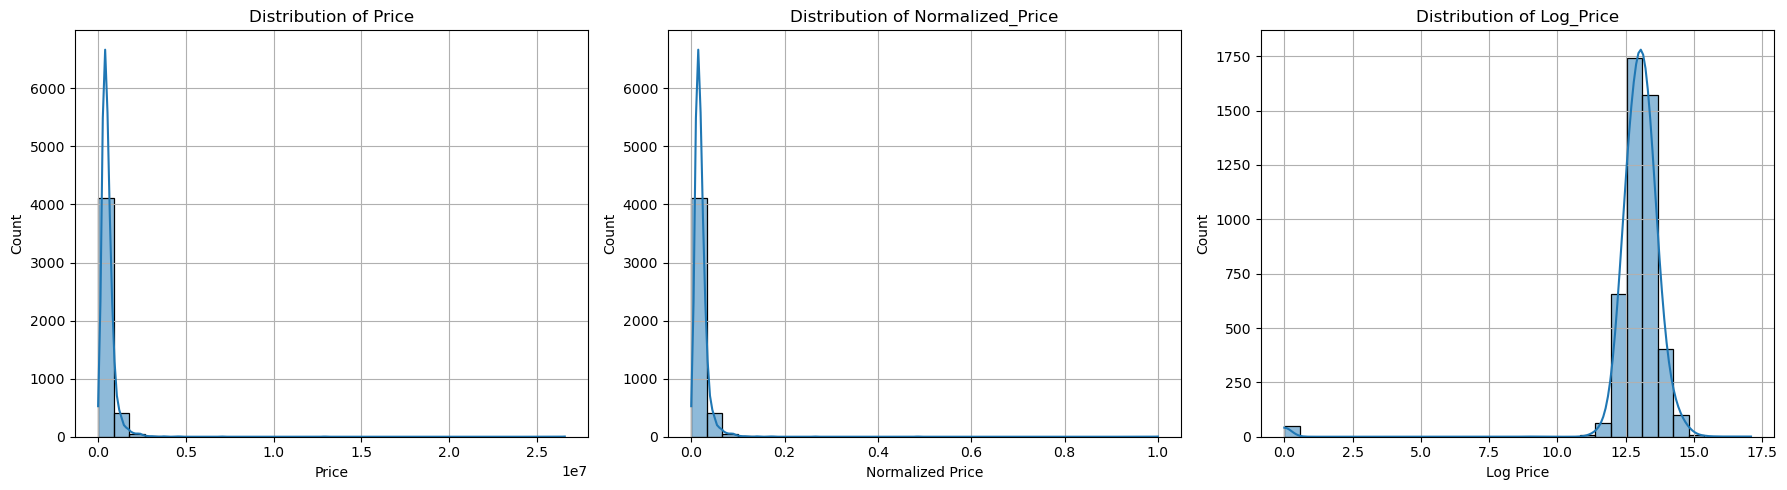

In [27]:
# Side-by-side visualization of Price and Normalized_Price
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Original Price distribution
plt.subplot(1, 3, 1)
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)

# Normalized Price distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Normalized_Price'], kde=True, bins=30)
plt.title('Distribution of Normalized_Price')
plt.xlabel('Normalized Price')
plt.ylabel('Count')
plt.grid(True)

# Log Price distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Log_Price'], kde=True, bins=30)
plt.title('Distribution of Log_Price')
plt.xlabel('Log Price')
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.show()


# __7. Data Binning__
Data binning is a data transformation technique used to convert continuous numerical data into discrete bins or intervals.
- This process helps simplify the analysis of trends, handle outliers, and make data more suitable for certain types of analyses or machine learning algorithms.
- It involves grouping numeric values into predefined ranges, creating a categorical representation of the data.

Let's create bins of the price feature to create a new feature called Price_Category.

In [28]:
# Data Binning: Creating bins for the 'price' column
# Define bin edges and labels
price_bins = [0, 200000, 400000, 600000, 800000, 1e6, df['price'].max()]
price_labels = ['Very Low', 'Low', 'Mid', 'High', 'Very High', 'Luxury']

# Create a new categorical feature 'Price_Category'
df['Price_Category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, include_lowest=True)

# Display value counts for the new category
print("\nPrice Category Distribution:")
display(df['Price_Category'].value_counts())

# Show the first few rows
df[['price', 'Price_Category']].head()



Price Category Distribution:


Price_Category
Low          1567
Mid          1417
High          718
Luxury        340
Very High     320
Very Low      238
Name: count, dtype: int64

,price,Price_Category
0,313000.0,Low
1,2384000.0,Luxury
2,342000.0,Low
3,420000.0,Mid
4,550000.0,Mid


# __8. Handling Outliers__

Outliers can significantly impact analysis and modeling. Identifying and addressing outliers is crucial for maintaining the accuracy of results.

###  Outlier Treatment Methods

| Method                        | Description                                                                 | When to Use                                                                 |
|------------------------------|-----------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Removal**                  | Drop rows with outliers                                                     | When outliers are clearly data entry errors or irrelevant to your analysis  |
| **Capping (Winsorization)**  | Replace outliers with nearest non-outlier boundary (e.g., 1st & 99th percentile) | When you want to keep all data but reduce the influence of extreme values   |
| **Transformation**           | Apply `log`, `sqrt`, or `Box-Cox` to reduce the effect of extreme values   | For skewed data like income, price, or area                                 |
| **Imputation**               | Replace outliers with the mean, median, or mode of the distribution         | When you believe the outlier is an error or anomaly                         |
| **Clustering or Modeling**   | Detect outliers using ML models or clustering (e.g., Isolation Forest)     | For complex or multivariate outlier detection                               |
| **Z-score / IQR filtering**  | Flag values that fall outside 3 std devs (Z-score) or IQR × 1.5             | Common statistical method for numeric data                                  |

Let's demonstrate the Capping (Winsorization) method of outlier treatment with the price feature

In [29]:
# Handling outliers by winsorizing
from scipy.stats.mstats import winsorize

# Check if 'price' column exists in the DataFrame
if 'price' in df.columns:
    # Winsorizing the 'price' column to limit the most extreme outliers on each side (bottom 5% and top 5%)
    df['Winsorized_Price'] = winsorize(df['price'], limits=[0.05, 0.05])

    # Displaying the DataFrame with the winsorized column
    print("DataFrame with winsorized column:")
    display(df[['price', 'Winsorized_Price']].head())
else:
    print("The 'price' column does not exist in the DataFrame.")

DataFrame with winsorized column:


,price,Winsorized_Price
0,313000.0,313000.0
1,2384000.0,1184000.0
2,342000.0,342000.0
3,420000.0,420000.0
4,550000.0,550000.0


In [30]:
df['price'].value_counts()

price
0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: count, Length: 1741, dtype: int64

In [31]:
df['Winsorized_Price'].value_counts()

Winsorized_Price
200000.0     238
1184000.0    231
300000.0      42
400000.0      31
450000.0      29
            ... 
465500.0       1
472500.0       1
439800.0       1
391000.0       1
220600.0       1
Name: count, Length: 1474, dtype: int64

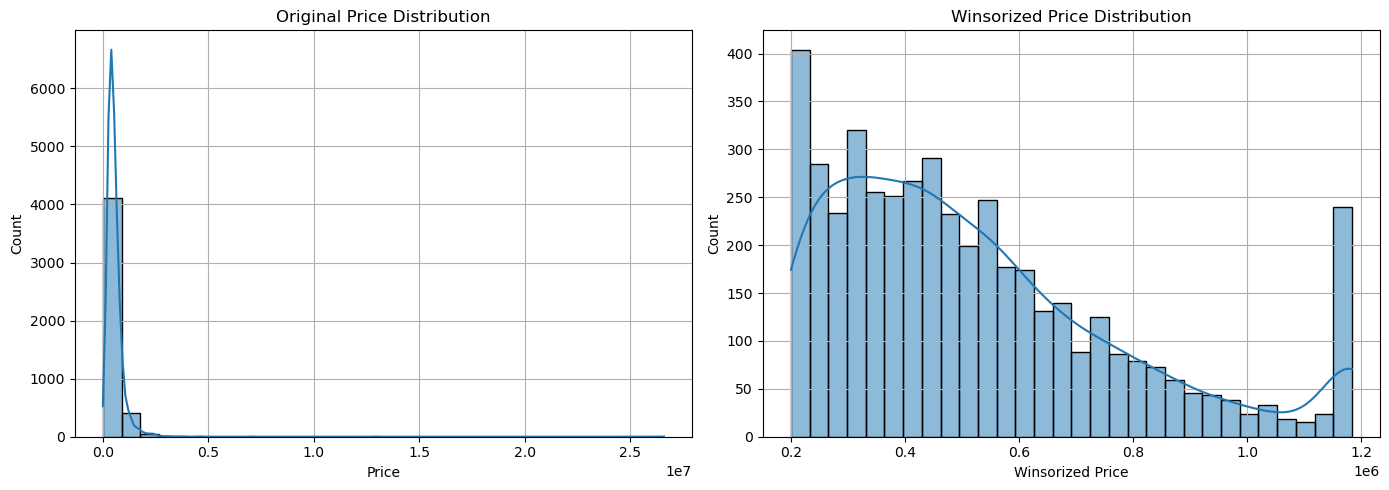

In [32]:
# Visualize original vs. winsorized price to illustrate outlier treatment
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# Original Price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)

# Winsorized Price distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Winsorized_Price'], kde=True, bins=30)
plt.title('Winsorized Price Distribution')
plt.xlabel('Winsorized Price')
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.show()

### Option-by-Option Breakdown for Handling `price`

| Technique        | When to Use                                                                 |
|------------------|------------------------------------------------------------------------------|
| **Log Transform** (`log(price)`) | When the data is **highly skewed**. Helps linearize exponential relationships. Ideal for **regression modeling**. |
| **Normalization** (`(price - min) / (max - min)`) | When you need all features on the same **[0–1] scale**, especially for **distance-based models** (like k-NN, SVM, neural networks). |
| **Winsorization** | When you want to **preserve distribution shape** but **dampen the effect of extreme outliers**. Useful before summary statistics or **tree-based models**. |
| **Combination** | Often, we use **log + normalization** (log first to fix skew, then normalize). Or **winsorize + normalize** for robust preprocessing. |



> There is no single best way to treat price. It depends on the distribution, the model, and the business goal. In practice, we often experiment with a few transformations and pick the one that works best in cross-validation.

# __9. Pandas Joining Techniques__

Pandas provides various joining techniques, such as merging, joining, and concatenating, which allow datasets to be combined using one or more keys. Each method has unique behaviors and applications.


- **Concatenate**:  appends DataFrames vertically or horizontally, offering a straightforward way to combine datasets with distinct columns or indices without regard for overlapping keys or index values.

- **Merge**:  combines DataFrames by aligning columns with shared keys, allowing for detailed control over overlapping column names and the use of multiple keys.

- **Join**:  aligns DataFrames based on their index values, making it ideal for coordinating data with corresponding indices.

These techniques are essential for integrating and analyzing different datasets. They enable a thorough understanding and help in making informed decisions in data-driven applications.

## __9.1 Pandas Concatenate__

- The __pd.concat()__ method combines DataFrames along rows or columns, preserving indices and columns.
- Specify axis=0 to concatenate along rows (vertical concatenation) or axis=1 to concatenate along columns (horizontal concatenation).

In [33]:
df1 = pd.DataFrame(
   {
       "A": ["A0", "A1", "A2", "A3"],
       "B": ["B0", "B1", "B2", "B3"],
       "C": ["C0", "C1", "C2", "C3"],
       "D": ["D0", "D1", "D2", "D3"],
   },
   index=[0, 1, 2, 3],
)
display(df1)

df2 = pd.DataFrame(
   {
       "A": ["A4", "A5", "A6", "A7"],
       "B": ["B4", "B5", "B6", "B7"],
       "C": ["C4", "C5", "C6", "C7"],
       "D": ["D4", "D5", "D6", "D7"],
   },
   index=[4, 5, 6, 7],
)
display(df2)

df3 = pd.DataFrame(
   {
       "A": ["A8", "A9", "A10", "A11"],
       "B": ["B8", "B9", "B10", "B11"],
       "C": ["C8", "C9", "C10", "C11"],
       "D": ["D8", "D9", "D10", "D11"],
   },
   index=[8, 9, 10, 11],
)
display(df3)

frames = [df1, df2, df3]
Result = pd.concat(frames)
display(Result)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Concatenate.png)

Here's another example illustrating concatenation along both the vertical and horizontal axes.

In [34]:
import pandas as pd

# Create two sample DataFrames
df1 = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]})

df2 = pd.DataFrame({'A': [7, 8, 9],
                    'B': [10, 11, 12]})

# Concatenate along rows (stack vertically)
Result_row = pd.concat([df1, df2], axis=0)

# Concatenate along columns (stack horizontally)
Result_column = pd.concat([df1, df2], axis=1)

print("\nDataframe 1:")
display(df1)
print("\nDataframe 2:")
display(df2)

print("\nConcatenated along rows:")
display(Result_row)

print("\nConcatenated along columns:")
display(Result_column)


Dataframe 1:


,A,B
0,1,4
1,2,5
2,3,6



Dataframe 2:


,A,B
0,7,10
1,8,11
2,9,12



Concatenated along rows:


,A,B
0,1,4
1,2,5
2,3,6
0,7,10
1,8,11
2,9,12



Concatenated along columns:


,A,B,A,B
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


## __9.2 Pandas Merge DataFrames__

- Utilize the  **pd.merge()** method to merge DataFrames based on specific keys or columns.
- Specify the join type in Pandas merge, which controls how rows from two DataFrames are combined.
- This ensures data alignment and prevents unintended outcomes.
- Choose the appropriate `how` parameter to specify the type of join.
- Specify the `on` parameter to indicate the column(s) to merge on.



###  Types of Joins in `pd.merge()` (pandas)

| Join Type       | Description                                                                 | Behavior                                                                      |
|------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| **Inner**        | Returns only rows with matching keys in both DataFrames                    | Keeps rows where the key exists in **both** left and right                    |
| **Left**         | All rows from the left DataFrame, with matches from the right if available | Keeps **all rows from left**, adds matching right rows, fills unmatched with NaN |
| **Right**        | All rows from the right DataFrame, with matches from the left if available | Keeps **all rows from right**, adds matching left rows, fills unmatched with NaN |
| **Outer**        | All rows from both DataFrames                                               | Keeps **all rows**, fills unmatched entries from either side with NaN         |
| **Cross**        | Cartesian product of rows in both DataFrames                               | Returns all possible combinations of rows from left and right (no keys needed) |


In [35]:
left = pd.DataFrame(
   {
      "key1": ["K0", "K0", "K1", "K2"],
      "key2": ["K0", "K1", "K0", "K1"],
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
   }
)
right = pd.DataFrame(
   {
      "key1": ["K0", "K1", "K1", "K2"],
      "key2": ["K0", "K0", "K0", "K0"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
   }
)
print("\nDataframe 1:")
display(left)
print("\nDataframe 2:")
display(right)


Dataframe 1:


,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3



Dataframe 2:


,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


**Outer Join**

In [36]:
Result = pd.merge(left, right, how="outer", on=["key1", "key2"])
display(Result)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/outer_merge.png)


**Inner Join**

In [37]:
Result = pd.merge(left, right, how="inner", on=["key1", "key2"])
display(Result)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_inner.png)

**Right Join**

In [38]:
Result = pd.merge(left, right, how="right", on=["key1", "key2"])
display(Result)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_right.png)

**Left Join**

In [39]:
Result = pd.merge(left, right, how="left", on=["key1", "key2"])
display(Result)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_letf.png)

**Cross**

In [40]:
Result = pd.merge(left, right, how="cross")
display(Result)

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_cross.png)

## __9.3 Pandas Join DataFrames__

- Use the __join()__ method to join DataFrames based on their indices
- Specify the `how` parameter to determine the type of join, similar to __pd.merge()__
- Use the `on` parameter if joining on specific columns, or simply call __join()__ without parameters to perform a simple index-based join




In [41]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key": ["K0", "K1", "K0", "K1"],
    }
)
display(left)

right = pd.DataFrame({"C": ["C0", "C1"],
                      "D": ["D0", "D1"]},
                      index=["K0", "K1"])
display(right)

Result = left.join(right, on="key")
display(Result)

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K1


,C,D
K0,C0,D0
K1,C1,D1


,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K0,C0,D0
3,A3,B3,K1,C1,D1


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/join.png)

## __10. Aggregating Data__

Aggregating data involves summarizing or grouping data based on specific criteria. This is useful for creating meaningful insights and reducing data dimensionality.

- Common aggregation functions include average(mean), median, minimum(min), maximum(max), sum, standard deviation(std), variance(var), and count.

In [42]:
import pandas as pd

# Creating a DataFrame with a 'Category' column and a 'Value' column
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Value': [10, 15, 20, 25, 30]}
df = pd.DataFrame(data)
display(df)

# Grouping the DataFrame by 'Category' and calculating various aggregations
df_aggregated = df.groupby('Category').agg({
    'Value': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count']
})

# Displaying the aggregated DataFrame
print("Aggregated DataFrame:")
df_aggregated

,Category,Value
0,A,10
1,B,15
2,A,20
3,B,25
4,A,30


Aggregated DataFrame:


Value                                           
          mean median min max sum        std    var count
Category                                                 
A         20.0   20.0  10  30  60  10.000000  100.0     3
B         20.0   20.0  15  25  40   7.071068   50.0     2

## __11. Reshaping Data__

Reshaping data includes pivoting, melting, or stacking data to achieve a structure suitable for specific analyses or visualizations.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Reshaping_data.png)

In [43]:
import pandas as pd

# Assuming you have a DataFrame 'df' with 'Date', 'Category', and 'Value' columns
# Adjust column names and DataFrame based on your actual data

# DataFrame
df = pd.DataFrame({'Date': ['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-02'],
                   'Category': ['A', 'B', 'A', 'B'],
                   'Value': [10, 15, 20, 25]})
display(df)

# Pivoting data for better analysis
df_pivoted = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='mean')

# Displaying the pivoted DataFrame
print("Pivoted DataFrame:")
display(df_pivoted)

,Date,Category,Value
0,2022-01-01,A,10
1,2022-01-01,B,15
2,2022-01-02,A,20
3,2022-01-02,B,25


Pivoted DataFrame:


Category,A,B
Date,,
2022-01-01,10.0,15.0
2022-01-02,20.0,25.0


# __Assisted Practice__

## __Problem Statement:__

The complexity of the housing market can be overwhelming. For a data scientist at a real estate company, the responsibility lies in analyzing housing data to uncover insights into house prices. The goal is to comprehend the elements influencing house prices and the impact of various house features on their price. This understanding aids the company in navigating the housing market more effectively and making well-informed decisions when purchasing and selling houses.

### Use 'housing_data.csv' from your local directory

## __Steps to Perform:__

- Understand the structure of the dataset, the types of variables, and any obvious issues in the data
- Check for duplicate entries in the dataset and decide how to handle them
- Identify and handle missing values. Decide whether to fill them in or drop them based on the context
- Apply the necessary transformations to the variables. This could include scaling numerical variables or encoding categorical variables
- For continuous variables, consider creating bins to turn them into categorical variables. For example, you can bin the __YearBuilt__ feature into decades
- Identify outliers in the dataset and decide on a strategy to handle them. You can use a box plot to visualize outliers in features like __LotArea__ or __SalePrice__

### Step 1: Understand the structure of the dataset, the types of variables, and any obvious issues in the data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [12]:
#load the data
df = pd.read_csv('../datasets/housing_data.csv')
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [13]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

In [14]:
display(df.columns)

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

#### Issue 1: unnamed:0 index cell

In [16]:
df.columns.str.contains('^Unnamed')

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [19]:
#remove the unnamed column
# list columns that start with 'Unnamed'
unnamed_columns = df.columns[df.columns.str.contains('^Unnamed')].tolist()
df.drop(columns=unnamed_columns, inplace=True)
# Display the DataFrame after removing unnamed columns
display(df.head())


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


#### Issue 2: lot of NANs

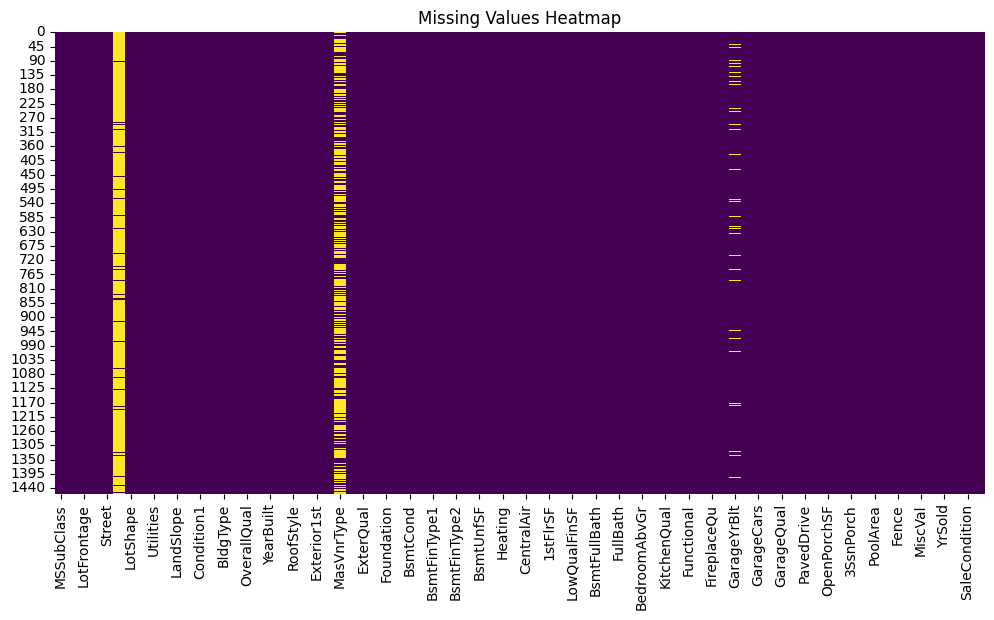

In [20]:
#visualise the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### Step 2: Check for duplicate entries in the dataset and decide how to handle them

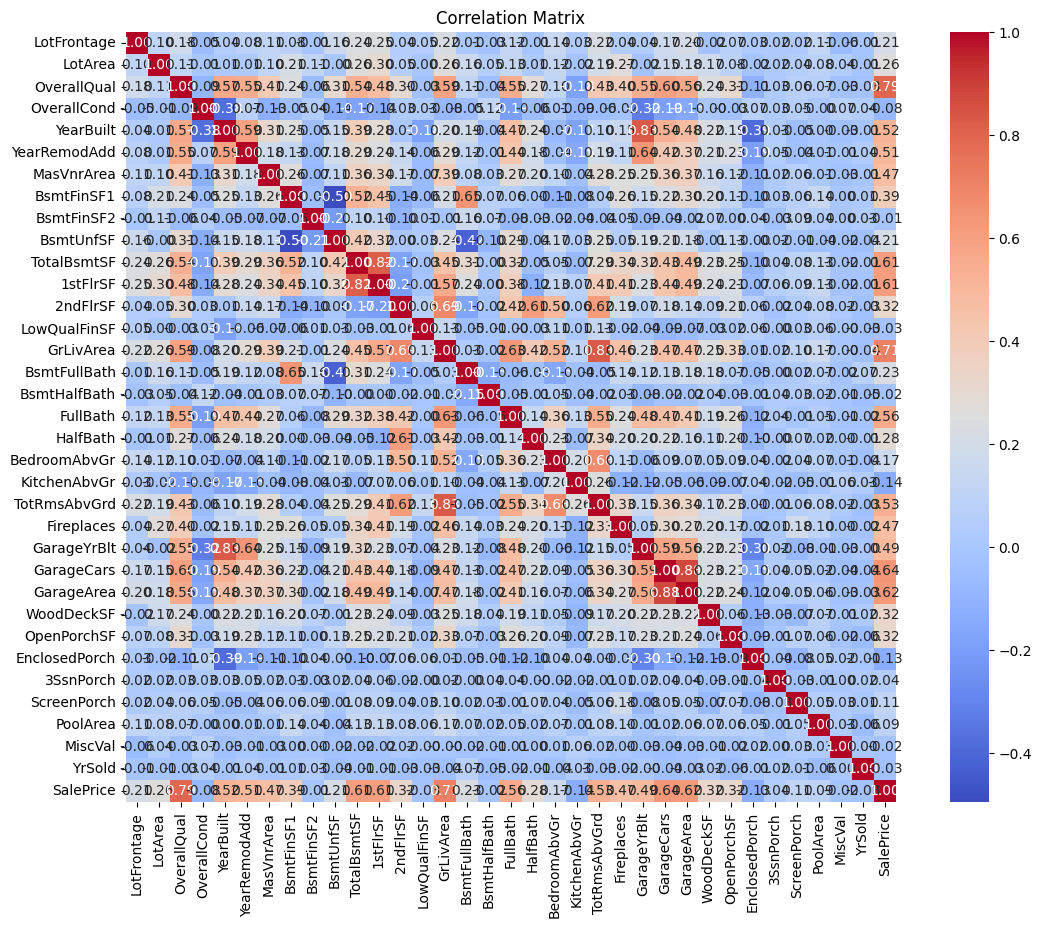

In [22]:
#visualise correlation matrix of numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(14, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [25]:
 #another way
print("Number of duplicate rows:", df.duplicated().sum())
print("duplicate rows:")
display(df[df.duplicated()])
display(df[df.duplicated()].shape)

Number of duplicate rows: 0
duplicate rows:


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


(0, 80)

### Step 3: Identify and handle missing values. Decide whether to fill them in or drop them based on the context

In [34]:
#columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_columns)
#describe the columns with missing values
for col in missing_columns:
    display(df[col].value_counts())



Columns with missing values: ['Alley', 'MasVnrType', 'Electrical', 'GarageYrBlt']


Alley
Grvl    50
Pave    41
Name: count, dtype: int64

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1900.0     1
1927.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

#### Analyse missing values in garage

In [36]:
#garage columns
garage_cols = [col for col in df.columns if 'garage' in col.lower()]
print("Garage-related columns:", garage_cols)
# Display rows with null values in GarageYrBlt
garage_yr_blt_null = df[df['GarageYrBlt'].isnull()]
print("Rows with null values in GarageYrBlt:")
display(garage_yr_blt_null[garage_cols])

Garage-related columns: ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
Rows with null values in GarageYrBlt:


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,No,NaN,No,0,0,No,No
48,No,NaN,No,0,0,No,No
78,No,NaN,No,0,0,No,No
88,No,NaN,No,0,0,No,No
89,No,NaN,No,0,0,No,No
...,...,...,...,...,...,...,...
1349,No,NaN,No,0,0,No,No
1407,No,NaN,No,0,0,No,No
1449,No,NaN,No,0,0,No,No
1450,No,NaN,No,0,0,No,No


In [37]:
garage_yr_blt_null['GarageType'].value_counts()

GarageType
No    81
Name: count, dtype: int64

In [38]:
#analyse the 'electrical' column
electrical_counts = df['Electrical'].value_counts()
print("Electrical column value counts:")
display(electrical_counts)


Electrical column value counts:


Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

### Recommended Imputation Strategies for Missing Columns

| Column         | Recommended Imputation Strategy                                                                                   | Rationale                                                                                      |
|----------------|------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| **Alley**      | Impute with a new category (e.g., `'NoAlley'` or `'None'`)                                                       | Most values are missing; likely indicates "no alley access" rather than missing at random.     |
| **MasVnrType** | Impute with the mode (most frequent value) or a new category (e.g., `'None'`)                                    | Missing values may indicate no masonry veneer; a new category preserves this information.      |
| **Electrical** | Impute with the mode (most frequent value, e.g., `'SBrkr'`)                                                      | Only one value missing; mode imputation is safe and preserves data consistency.                |
| **GarageYrBlt**| Impute with `YearBuilt` if garage exists, or leave as NaN if no garage (based on `GarageType`), or use the median| Missing values often correspond to houses with no garage; otherwise, align with house year.    |


In [40]:
#impute missing values in 'GarageYrBlt' with year built if GarageType is not No
def impute_garage_yr_blt(row):
    if pd.isnull(row['GarageYrBlt']) and row['GarageType'] != 'No':
        return row['YearBuilt']
    return row['GarageYrBlt']
df['GarageYrBlt'] = df.apply(impute_garage_yr_blt, axis=1)
#impute missing values in 'Electrical' with the mode
imputer = SimpleImputer(strategy='most_frequent')
df['Electrical'] = imputer.fit_transform(df[['Electrical']]).ravel()
#impute missing values in 'MasVnrType' with None
df['MasVnrType'] = df['MasVnrType'].fillna('None')
#impute Alley with 'No Alley'
df['Alley'] = df['Alley'].fillna('NoAlley')
#check if there are still missing values
missing_after_imputation = df.isnull().sum()
print("Missing values after imputation:")
display(missing_after_imputation[missing_after_imputation > 0])

Missing values after imputation:


GarageYrBlt    81
dtype: int64

### Step 4: Apply the necessary transformations to the variables. This could include scaling numerical variables or encoding categorical variables

In [44]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

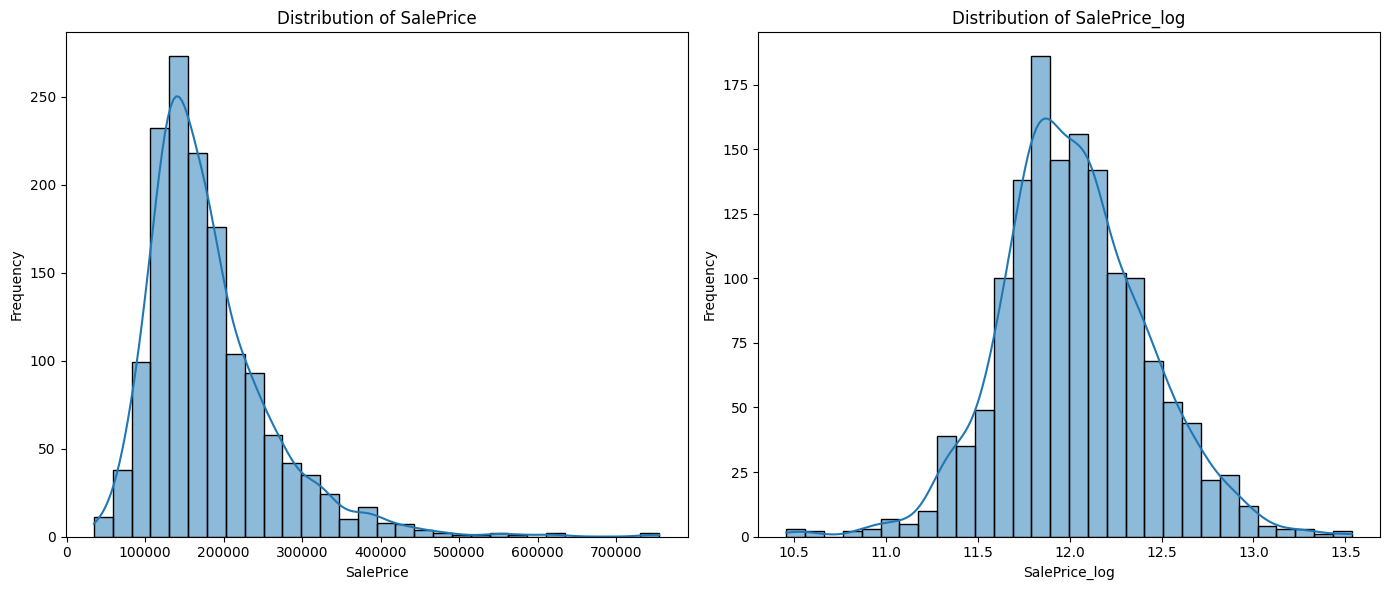

In [46]:
df['SalePrice_log'] = np.log(df['SalePrice'])  # Apply log transformation to SalePrice
# Visualize the distribution of SalePrice vs SalePrice_log after log transformation
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(df['SalePrice_log'], kde=True, bins=30)
plt.title('Distribution of SalePrice_log')
plt.xlabel('SalePrice_log')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [48]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object')

# Count unique categories
unique_counts = categorical_cols.nunique().sort_values()

# Identify columns with 10 or fewer unique categories (good for one-hot encoding)
one_hot_candidates = unique_counts[unique_counts <= 100]

# Summarize results
one_hot_summary = pd.DataFrame({
    "Unique Categories": one_hot_candidates,
    "Recommended Encoding": "One-Hot Encoding"
})
one_hot_summary

,Unique Categories,Recommended Encoding
Street,2,One-Hot Encoding
Utilities,2,One-Hot Encoding
CentralAir,2,One-Hot Encoding
Alley,3,One-Hot Encoding
LandSlope,3,One-Hot Encoding
PavedDrive,3,One-Hot Encoding
ExterQual,4,One-Hot Encoding
LandContour,4,One-Hot Encoding
MasVnrType,4,One-Hot Encoding
BsmtExposure,4,One-Hot Encoding


In [57]:
#one hot encode the Neighborhood column
df = pd.get_dummies(df, columns=['Neighborhood'], prefix='Neighborhood', drop_first=True)


KeyError: "None of [Index(['Neighborhood'], dtype='object')] are in the [columns]"

In [59]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object', length=104)

### Step 5: For continuous variables, consider creating bins to turn them into categorical variables. For example, you can bin the __YearBuilt__ feature into decades

In [61]:
df['YearBuilt'].describe()
# Create bins for 'YearBuilt' to categorize houses by age, with bins of 10 years
bins = np.arange(df['YearBuilt'].min(), df['YearBuilt'].max() + 10, 10)
# Create labels for the bins
labels = [f"{i}-{i+9}" for i in bins[:-1]]
# Create a new column 'AgeGroup' based on the bins
df['AgeGroup'] = pd.cut(df['YearBuilt'], bins=bins, labels=labels, right=False)
# Display the new 'AgeGroup' column
print("AgeGroup distribution:")
display(df['AgeGroup'].value_counts().sort_index())


AgeGroup distribution:


AgeGroup
1872-1881      6
1882-1891      5
1892-1901     14
1902-1911     23
1912-1921     76
1922-1931     76
1932-1941     72
1942-1951     72
1952-1961    172
1962-1971    190
1972-1981    157
1982-1991     63
1992-2001    190
2002-2011    344
Name: count, dtype: int64

### Step 6: Identify outliers in the dataset and decide on a strategy to handle them. You can use a box plot to visualize outliers in features like __LotArea__ or __SalePrice__

In [66]:
#identify columns with outliers
outlier_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
# Detect outliers in each numeric column
outliers_dict = {}
for col in outlier_cols:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        outliers_dict[col] = outliers
        print(f"Outliers detected in column '{col}': {len(outliers)} rows")
    

Outliers detected in column 'LotFrontage': 16 rows
Outliers detected in column 'LotArea': 69 rows
Outliers detected in column 'OverallQual': 2 rows
Outliers detected in column 'OverallCond': 125 rows
Outliers detected in column 'YearBuilt': 7 rows
Outliers detected in column 'MasVnrArea': 98 rows
Outliers detected in column 'BsmtFinSF1': 7 rows
Outliers detected in column 'BsmtFinSF2': 167 rows
Outliers detected in column 'BsmtUnfSF': 29 rows
Outliers detected in column 'TotalBsmtSF': 61 rows
Outliers detected in column '1stFlrSF': 20 rows
Outliers detected in column '2ndFlrSF': 2 rows
Outliers detected in column 'LowQualFinSF': 26 rows
Outliers detected in column 'GrLivArea': 31 rows
Outliers detected in column 'BsmtFullBath': 1 rows
Outliers detected in column 'BsmtHalfBath': 82 rows
Outliers detected in column 'BedroomAbvGr': 35 rows
Outliers detected in column 'KitchenAbvGr': 68 rows
Outliers detected in column 'TotRmsAbvGrd': 30 rows
Outliers detected in column 'Fireplaces': 5 row